# Using Decision Trees Determine Twitter Sentiment
As a project for my Knowledge Technologies class I was required to analyze a Twitter set and try to determine the sentiment of the tweets.

The dataset contained over 30K labeled tweets. The scope of this project does not include feature engineering/selection so it was ommited. The main goal was to analyze the results of Decision Tree via its main metrics.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from main_metrics import main_metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
train=pd.read_csv(r'path/to/file')
dev=pd.read_csv('path/to/file')

In [3]:
train.head()

,id,a,amazing,antman,are,at,awesome,best,birthday,cant,...,see,shit,so,stupid,supremacists,th,they,tomorrow,trump,sentiment
0,8.023340e+17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,6.247650e+17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,8.055830e+17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
3,6.374800e+17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,positive
4,6.410960e+17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,neutral


Remove the "id" column and separate the labels from the dataset

In [4]:
train_data=train[train.columns[1:-1]]
train_target=train[train.columns[-1]]

In [5]:
dev_data=dev[dev.columns[1:-1]]
dev_target=dev[dev.columns[-1]]

Since overfitting is a special issue in Decision Trees, I want to determine the maximum depth of the tree before overfitting it.

In [6]:
comp=0
acc1=[]
acc12=[]
itera=[]
for i in range(3,50):
    dt_tree=tree.DecisionTreeClassifier(max_depth=i)
    model_dt=dt_tree.fit(train_data, train_target)
    predictions_dt=model_dt.predict(dev_data)
    predictions_dt2=model_dt.predict(train_data)
    acc=(dev_target == predictions_dt).sum()/float(len(dev_target))*100
    acc2=(train_target == predictions_dt2).sum()/float(len(train_target))*100
    itera.append(i)
    acc1.append(acc)
    acc12.append(acc2)

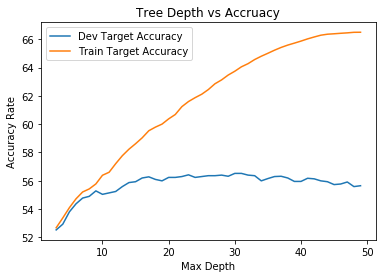

In [7]:
plt.plot(itera, acc1,label='Dev Target Accuracy')
plt.plot(itera, acc12,label='Train Target Accuracy')
plt.ylabel('Accuracy Rate')
plt.xlabel('Max Depth')
plt.title('Tree Depth vs Accruacy')
plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [8]:
dt_tree=tree.DecisionTreeClassifier(max_depth=10)
model_dt=dt_tree.fit(train_data, train_target)
predictions_dt=model_dt.predict(dev_data)

In [9]:
cm=confusion_matrix(dev_target,predictions_dt,labels=['positive','negative','neutral'])
print cm

[[ 505   22  961]
 [  82   62  894]
 [ 201   53 2146]]


Calculate the accuracy as a guide, not as a correct metric of performance

In [10]:
print '{0:.0f}%'.format((dev_target == predictions_dt).sum()/float(len(dev_target))*100)

55%


In [11]:
def labels(x):
    if x=='positive':
        return 1
    elif x=='negative':
        return -1
    else:
        return 0

In [12]:
dev_targ_lbls=[]
y_pred_lbls=[]
for i in range(len(dev_target)):
    dev_targ_lbls.append(labels(dev_target[i]))
    y_pred_lbls.append(labels(predictions_dt[i]))

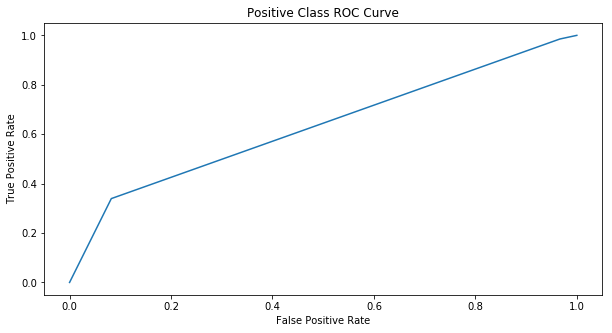

AUC 63%


In [13]:
fpr_dt_pos, tpr_dt_pos, thresholds = roc_curve(dev_targ_lbls, y_pred_lbls, pos_label=1)
plt.plot(fpr_dt_pos, tpr_dt_pos)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Positive Class ROC Curve')
#plt.rcParams["figure.figsize"] = (7,7)
plt.show()
print "AUC",'{0:.0f}%'.format(metrics.auc(fpr_dt_pos, tpr_dt_pos)*100)

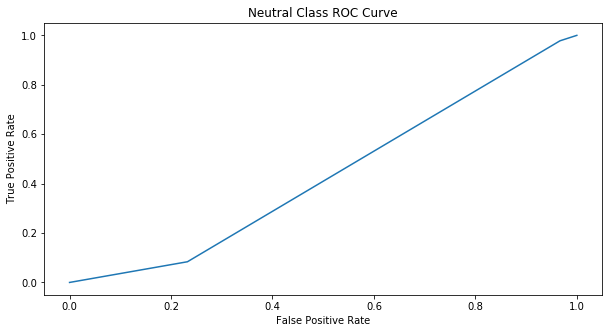

AUC 43%


In [14]:
fpr_dt_neu, tpr_dt_neu, thresholds = roc_curve(dev_targ_lbls, y_pred_lbls, pos_label=0)
plt.plot(fpr_dt_neu, tpr_dt_neu)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Neutral Class ROC Curve')
plt.show()
print "AUC",'{0:.0f}%'.format(metrics.auc(fpr_dt_neu, tpr_dt_neu)*100)

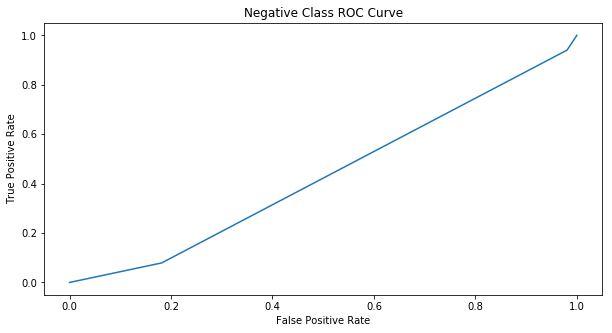

AUC 43%


In [15]:
fpr_dt_neg, tpr_dt_neg, thresholds = roc_curve(dev_targ_lbls, y_pred_lbls, pos_label=-1)
plt.plot(fpr_dt_neg, tpr_dt_neg)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Negative Class ROC Curve')
plt.show()
print "AUC",'{0:.0f}%'.format(metrics.auc(fpr_dt_neg, tpr_dt_neg)*100)

In [16]:
df=main_metrics(cm,['positive','negative','neutral'])
print df

        negative      neutral     positive
FP     75.000000  1855.000000   283.000000
FN    976.000000   254.000000   983.000000
TP     62.000000  2146.000000   505.000000
TN   3813.000000   671.000000  3155.000000
TPR     0.059730     0.894167     0.339382
TNR     0.980710     0.265637     0.917685
PPV     0.452555     0.536366     0.640863
NPV     0.796200     0.725405     0.762446
FPR     0.019290     0.734363     0.082315
FNR     0.940270     0.105833     0.660618
FDR     0.547445     0.463634     0.359137
ACC     0.786642     0.571864     0.742996
